In [38]:
import torch
import importlib
import matplotlib.pyplot as plt
import src.generate_env as generate_env
importlib.reload(generate_env)
import src.physics as physics
importlib.reload(physics)
import src.EINCASMConfig as EINCASMConfig
importlib.reload(EINCASMConfig)

cfg = EINCASMConfig.Config('config.yaml')

# Weather Brainstorming
Date: 2023-09-20 19:22
Priors:
- [[EINCASM Physics Code]]
Todos:
-

---

Weather interacts with the dispersal and regeneration rates. E.g. During winter things regenerate slower and might have a lower dispersal rate too.

  

Weather can be determined by a set of overlapping frequencies -- like a reverse fourier transform of the tides. It could also be evolved given a broader objective function like empowerment or entropy production. The realization of this weather would look like 2d perlin noise but determined by this predictable-at-different-scales frequency function. This could also appear over multiple channels so that the different frequencies could interact with different sorts of resources, however this simple one dimensional valence is probably sufficient as a base to form the general capacity to cope with more complex functions. Thought -- could this be connected to [[Qualia Research Institute]] by taking the shape of qualia -- valence manifolds, polyhedra etc.. 

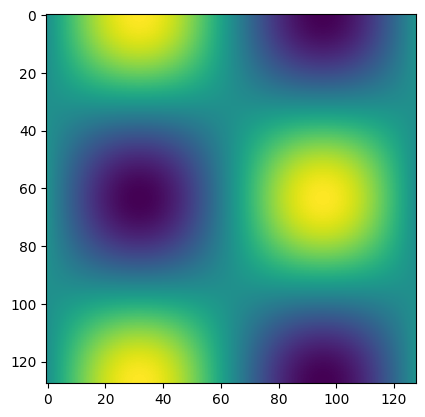

In [2]:
import numpy as np
import matplotlib.animation as animation

# Define the grid
x = np.linspace(0, 2 * np.pi, 128)
y = np.linspace(0, 2 * np.pi, 128)
X, Y = np.meshgrid(x, y)

# Define the wave function
def wave(x, y, t):
    return np.sin(x + t) * np.cos(y + t)

# Initialize the figure and axis
fig, ax = plt.subplots()
im = ax.imshow(wave(X, Y, 0), animated=True)

# Define the update function for the animation
def updatefig(*args):
    global X, Y
    t = args[0]
    im.set_array(wave(X, Y, t))
    return im,

# Create the animation
ani = animation.FuncAnimation(fig, updatefig, frames=np.linspace(0, 2 * np.pi, 128), interval=50, blit=True)
plt.show()


# Random agent using below physics

In [ ]:
# Neighborhood (kernel) of: capital, scent, prev_flow, hidden channels
# Only center of: muscle_radii (n_kernel channels), 

# 1. Generate environment
env = generate_env.Environment(cfg)

# Port Channel: Interface, Source, Sink
Date: 2023-09-18 10:22
Priors:
- [[EINCASM Physics Code]]
Todos:
- 
---

The port channel in EINCASM is used to encode sources and sinks of capital. These need not be entirely binary in value, where a sink is always bad and a source is always good. Rather, a sink port could be an interface to another system which consumes energy but, in return, changes something in the environment beneficial to the organism. Similarly, though a source port increases the capital of an organism, this could come with the ingestion of a parasite -- a competing organism -- which could capitalize on the network of the organism. 

The port channel(s) are included to enable future developments like those described above, including connections to external tools, such as an API, but for now, and in the initial training/evolution, they are used solely as food sources and "poison" which give/take capital from overlapping cells and, in some configurations, increase/decrease efficiency of growth and flow.

### Brainstorming
---

Extraction could be done via a sort of self muscle, defined in the kernel? This might require a broader definition of muscle and kernel to be easily configurable, maybe a sort of filter or map or mask.

In [20]:
# How much capital is available via the port system
port = torch.tensor([
    [0, 0, 0, 0],
    [0, 0.0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
], device=cfg.device, dtype=cfg.float_dtype)

# How much capital is added or removed to the port system each time step
regeneration_rate = torch.tensor([
    [0, 0, 0.01, 0],
    [0, 0.0, 0, 0],
    [-0.01, 0, 0, 0],
    [0, 0, 0, 0]
], device=cfg.device, dtype=cfg.float_dtype)

# How much capital is added or removed from the organism each time step
dispersal_rate = torch.tensor([
    [0, 0, 0.1, 0],
    [0, 0, 0, 0],
    [0.2, 0, 0, 0],
    [0, 0, 0, 0]
], device=cfg.device, dtype=cfg.float_dtype)

capital = torch.tensor([
    [4, 3.0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
], device=cfg.device, dtype=cfg.float_dtype)

mine_activation = torch.tensor([
    [0, 0, 1, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
], device=cfg.device, dtype=cfg.float_dtype)

mine_muscle_radii = torch.tensor([
    [0, 0, 0.3, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
], device=cfg.device, dtype=cfg.float_dtype)

mine_efficiency = torch.tensor([
    [0, 0, 0.8, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
], device=cfg.device, dtype=cfg.float_dtype)

In [37]:
import src.videowriter as vw
from matplotlib import cm
importlib.reload(vw)

timesteps = 100
with vw.VideoWriter("./physics_simulation.mp4", fps=30) as vid:
    for t in range(timesteps):
        capital_port_before = (capital + port).sum()
        mine_activation = torch.rand_like(mine_activation, device=cfg.device, dtype=cfg.float_dtype)
        port, capital = physics.activate_and_mine_ports(cfg, capital, port, mine_efficiency, dispersal_rate, mine_muscle_radii,
                                                        mine_activation, regeneration_rate)
        assert (capital + port).sum() <= capital_port_before
        vid.add_concat_grids([capital.cpu(), port.cpu(), mine_activation.cpu()], cmaps=[cm.viridis, cm.plasma, cm.inferno], scale=64)

        # # Convert each tensor to a RGBA image using an efficient colormap operation
        # # Use a unique colormap for each tensor
        # capital_img = torch.tensor(cm.viridis(capital.cpu().numpy()), device=cfg.device, dtype=cfg.float_dtype)[:,:,:3]
        # port_img = torch.tensor(cm.plasma(port.cpu().numpy()), device=cfg.device, dtype=cfg.float_dtype)[:,:,:3]
        # mine_activation_img = torch.tensor(cm.inferno(mine_activation.cpu().numpy()), device=cfg.device, dtype=cfg.float_dtype)[:,:,:3]

        # # Concatenate the images along the first dimension (dim=1)
        # concatenated_images = torch.cat((capital_img, port_img, mine_activation_img), dim=1)

        # # Add the concatenated images to the video
    

In [21]:
# from matplotlib import cm
# import torchvision.io

# timesteps = 100
# # capital, port, activation side by side horizontally
# frames = torch.empty((timesteps, port.shape[0], port.shape[1]*3, 3), device=cfg.device, dtype=cfg.float_dtype)
# for t in range(timesteps):
#     available = port * dispersal_rate   # TODO Switch to a fixed amount per step?w
#     extraction = physics.activate_muscles(cfg, mine_muscle_radii, mine_activation)
#     extracted = torch.clamp(extraction, -capital, available)     # Positive -> extraction, negative -> deposition
#     # Positive extraction means capital is flowing from port to capital
#     # Negative extraction means capital is flowing from capital to port
#     capital_flow = torch.where(extracted > 0, extracted * mine_efficiency, extracted)
#     port_flow = torch.where(extracted < 0, extracted * mine_efficiency, extracted)
    
#     capital += capital_flow
#     port -= port_flow

#     port += regeneration_rate
    
#     # Convert each tensor to a RGBA image using an efficient colormap operation
#     # Use a unique colormap for each tensor
#     capital_img = torch.tensor(cm.viridis(capital.cpu().numpy()), device=cfg.device, dtype=cfg.float_dtype)[:,:,:3]
#     port_img = torch.tensor(cm.plasma(port.cpu().numpy()), device=cfg.device, dtype=cfg.float_dtype)[:,:,:3]
#     mine_activation_img = torch.tensor(cm.inferno(mine_activation.cpu().numpy()), device=cfg.device, dtype=cfg.float_dtype)[:,:,:3]

#     # Concatenate the images along the first dimension (dim=1)
#     concatenated_images = torch.cat((capital_img, port_img, mine_activation_img), dim=1)


#     # Ensure that the size of the concatenated images matches the size of frames[t]
#     if concatenated_images.shape == frames[t].shape:
#         frames[t] = concatenated_images
#     else:
#         print(f"Error: Mismatch in tensor sizes. frames[t] has size {frames[t].shape} but concatenated_images has size {concatenated_images.shape}")

# # frames = torch.stack(frames).permute(0, 3, 1, 2)
# # torchvision.io.write_video("physics_simulation.mp4", frames, fps=30)



In [22]:
# torchvision.io.write_video("physics_simulation.mp4", frames.cpu(), fps=30)

# Activation and Flow
Date: 2023-09-17 12:23
Priors:
- [[EINCASM Physics Code]]
Todos:
- 
---


Each cell has a set of channel equal in length to the kernel (minus 1 for the origin cell) that denote the weight of connecting edges between that cell and the cell offset from the origin by the amounts specified in the kernel.

The kernel is to be symmetric and start with the origin [0,0]. This means that by rolling the non-origin kernel by half of its length (length(kernel)-1) leaves the offsets in the order of their inverses. This mirrors a kernel. 

Each cell generates a single activation (though it is easy to allow for len(kernel) activations). This activation is positive or negative, as are the weights. If the result of multiplying the activation by the weights is negative, this indicates inverted flow (taking from a neighbor). To compute this, we can simply roll all negative flows such that they are in inverted positions and subtract (so add) them from the flows of their neighbors in the inverted direction (taking from your neighbor is the same as them giving something to you). 

At this point, the flow tensor should only include positive flows and previously negative flows should be set to 0. With this, we can evenly distribute the capital of each cell across its flows and update the capital of each cells' neighbors. This doesn't necessitate that all capital be moved from the cell, the activation could be small and flows associated with the origin (position 0) could be high, meaning capital is given to yourself in the next timestep. 

Muscles aren't allows to grow in directions that would lead to obstacles, nor grow with an origin of an obstacle, so flow need not take into account capital that would flow into an obstacle.

In [39]:
muscle_radii = torch.tensor([
    [[-1,  1, 0],       # (0,0) ORIGIN
     [-0.8,  0.8, 0],  
     [0, 0, 0]],  

    [[-0.6, 0.6, 0],    # UP
     [-0.4, 0.4, 0],   
     [0, 0, 0]],   

    [[-0.2, 0.2, 0],    # RIGHT
     [0, 0, 0],
     [0, 0, 0]],
    
    [[0.2, -0.2, 0],    # DOWN
     [0.4, -0.4, 0],
     [0, 0, 0]],
    
    [[0.6, -0.6, 0],    # LEFT
     [0.8, -0.8, 0],
     [0, 0, 0]]
], device=cfg.device, dtype=cfg.float_dtype)

activations = torch.tensor([
    [1, 1, 0],
    [1, 1, 0],
    [0, 0, 0]
], device=cfg.device, dtype=cfg.float_dtype)

capital = torch.tensor([
    [4, 3.0, 0],
    [2, 1, 0],
    [0, 0, 0]
], device=cfg.device, dtype=cfg.float_dtype)

flow_efficiency = torch.tensor([
    [0.8, 0.8, 0.8],
    [0.8, 0.8, 0.8],
    [0.8, 0.8, 0.8]
], device=cfg.device, dtype=cfg.float_dtype)

physics.activate_muscles_and_flow(cfg, capital, muscle_radii, activations, flow_efficiency)

(tensor([[3.0000, 2.1600, 0.6400],
         [1.2320, 0.3200, 0.8320],
         [0.2560, 0.3200, 0.0000]], device='mps:0'),
 tensor([[[0.8000, 0.8000, 0.0000],
          [0.5120, 0.3200, 0.0000],
          [0.0000, 0.0000, 0.0000]],
 
         [[0.0000, 0.3200, 0.0000],
          [0.0000, 0.1600, 0.0000],
          [0.0000, 0.0000, 0.0000]],
 
         [[0.0000, 0.3200, 0.0000],
          [0.0000, 0.3200, 0.0000],
          [0.0000, 0.0000, 0.0000]],
 
         [[0.3200, 0.0000, 0.0000],
          [0.2560, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000]],
 
         [[0.3200, 0.0000, 0.0000],
          [0.5120, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000]]], device='mps:0'))

# Muscle Growth
Date: 2023-09-16
Priors:
- [[EINCASM Physics Code]]
Todos:
- 
---


Cell growth in EINCASM requires an exchange of a cell's capital to slowly adjust the magnitude of a muscle oriented in a specific direction. If the change in magnitude of a muscle is positive, capital is taken from the cell with an adjustment for "heat loss" reflecting the efficiency of the process. If the change in magnitude is negative, capital, minus a loss, is returned to the cell. 

Muscles, as explained in #Activation and Flow, have an orientation and can be positive or negative. They are encoded in the world tensor as a set of channels where each is associated via order of index with the kernel, which contains offsets. If EINCASM is set up to only have a singular positive or negative activation per cell, then negative and positive muscles always have inverted flows in respect to each other. Because a cell can only change its muscle weights slowly and at a cost of wasted capital, it is to their advantage to choose an orientation and stick to it. 

There are multiple ways muscle growth can be accounted for in EINCASM. The default set up is to have the muscle channels denote the radius and charge of a muscle fiber. The output of the physiology of each cell indicates a change in radius, but the cost of growth is proportional to the cross-sectional area of the new muscle radius minus the original. This set up is chosen to enable flexibilty at a wider range of muscle magnitude scales without drastic changes to weights within the physiology (a neural network). The same cell that controls the small, exploratory muscle fibers/transport tubes can control the very large, established muscles next to large nutrient sources. 

### Obstacles and Obstacle Masks

Obstacles are currently handled during muscle growth rather than flow. No muscle can grow in the direction of an adjacent obstacle. It is possible to implement this during flow where capital rebounds to the origin cell, but handling this during muscle growth is simpler.

In [2]:
kernel = torch.tensor([
    [0, 0],     # ORIGIN
    [-1, 0],    # UP
    [0, 1.0],   # RIGHT
    [1, 0],     # DOWN
    [0, -1]     # LEFT
], device=cfg.device, dtype=cfg.float_dtype)

muscle_radii = torch.tensor([
    [[0, 0, 0],     # ORIGIN
     [0, 0, 0],
     [0, 0, 0]],  

    [[-1, -4.0, 0], # UP
     [1, 4, 0],
     [0, 0, 0]],   

    [[2, 1, 0],     # RIGHT
     [2, 5, 0],
     [0, 0, 0]],
    
    [[0.0, 0.0, 0], # DOWN
     [0.0, 0.0, 0],
     [0.0, 0.0, 0]],
    
    [[0.0, 0.0, 0], # LEFT
     [0.0, 0.0, 0],
     [0.0, 0.0, 0]]
], device=cfg.device, dtype=cfg.float_dtype)

radii_deltas = torch.tensor([
    [[0, 0, 0],        # ORIGIN
     [0, 0, 0],
     [0, 0, 0]],

    [[1.0, 2.0, 0],    # UP
     [-3.0, 1.0, 0],
     [0, 0, 0]],

    [[1.0, -1.0, 0],   # RIGHT
     [-4.0, 2.0, 0.0],
     [0, 1.0, 0]],

    [[0.0, 0.0, 0],    # DOWN
     [0.0, 0.0, 1.0],
     [0.0, 0.0, 0]],

    [[0.0, 0.0, 0],    # LEFT
     [0.0, 0.0, 0],
     [0.0, 0.0, 0]]
], device=cfg.device, dtype=cfg.float_dtype)     

capital = torch.tensor([
    [5.0, 3.0, 0],
    [4.0, 10.0, 0],
    [0, 0, 0]
], device=cfg.device, dtype=cfg.float_dtype)

growth_efficiency = torch.tensor([
    [0.8, 0.85, 0],
    [0.9, 1.0, 0],
    [0, 0, 0]
], device=cfg.device, dtype=cfg.float_dtype)

open_cells = torch.tensor([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 0]
], dtype=torch.bool, device=cfg.device) # 1 = free, 0 = obstacle

muscle_masks = physics.generate_muscle_masks(cfg, open_cells)

physics.grow_muscle_csa(cfg, muscle_radii, radii_deltas, capital, growth_efficiency, muscle_masks, open_cells)

(tensor([[[ 0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000]],
 
         [[ 0.0000, -2.0000,  0.0000],
          [-1.9235,  4.3275,  0.0000],
          [ 0.0000,  0.0000,  0.0000]],
 
         [[ 2.8284,  0.0000,  0.0000],
          [-2.0000,  5.6809,  0.0000],
          [ 0.0000,  0.0000,  0.0000]],
 
         [[ 0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000]],
 
         [[ 0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000]]], device='mps:0'),
 tensor([[ 0.8000, 14.0500,  0.0000],
         [ 1.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000]], device='mps:0'))

In [78]:
# directional_masks = torch.ones_like(muscle_radii, dtype=torch.bool)

# for i in range(kernel.shape[0]):
#     directional_masks[i] = torch.roll(open_cells, shifts=tuple(map(int, -kernel[i])), dims=[0, 1])
# directional_masks&open_cells

# assert muscle_radii[~muscle_masks].sum() < 1e-6, "Muscle radii in/towards obstacle cells is not zero."
# muscle_radii *= muscle_masks
# radii_deltas *= muscle_masks
# assert capital[~open_cells].sum() < 1e-6, "Capital in obstacle cells is not zero."
# capital *= open_cells


# muscle_masks, muscle_radii

(tensor([[5, 5, 4],
         [5, 5, 4],
         [4, 4, 4]], device='mps:0'),
 tensor([[[   0.,    0.,    0.],
          [   0.,    0.,    0.],
          [   0.,    0.,    0.]],
 
         [[ -25., -100.,    0.],
          [  25.,  100.,    0.],
          [   0.,    0.,    0.]],
 
         [[  50.,   25.,    0.],
          [  50.,  125.,    0.],
          [   0.,    0.,    0.]],
 
         [[   0.,    0.,    0.],
          [   0.,    0.,    0.],
          [   0.,    0.,    0.]],
 
         [[   0.,    0.,    0.],
          [   0.,    0.,    0.],
          [   0.,    0.,    0.]]], device='mps:0'))